<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/05_tsne_kmeans_and_gmm_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv?token=GHSAT0AAAAAADCATCXNYHEDUGVQSEO3S454Z7ZND5A -O 3_direct_encoded.csv

--2025-04-11 19:09:04--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_direct_encoded.csv?token=GHSAT0AAAAAADCATCXNYHEDUGVQSEO3S454Z7ZND5A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9093 (8.9K) [text/plain]
Saving to: ‘3_direct_encoded.csv’

3_direct_encoded.cs 100%[===================>]   8.88K  --.-KB/s    in 0s      

2025-04-11 19:09:04 (75.7 MB/s) - ‘3_direct_encoded.csv’ saved [9093/9093]



In [6]:
# Load and prepare data
import pandas as pd
from sklearn.preprocessing import StandardScaler

full_data = pd.read_csv('3_direct_encoded.csv')
data_v2 = full_data.iloc[:, 2:]  # Exclude ID & Parameters

# Standardize
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_v2), columns=data_v2.columns)

K=6 | Silhouette=0.4473 | DBI=0.7234 | CH=90.8159


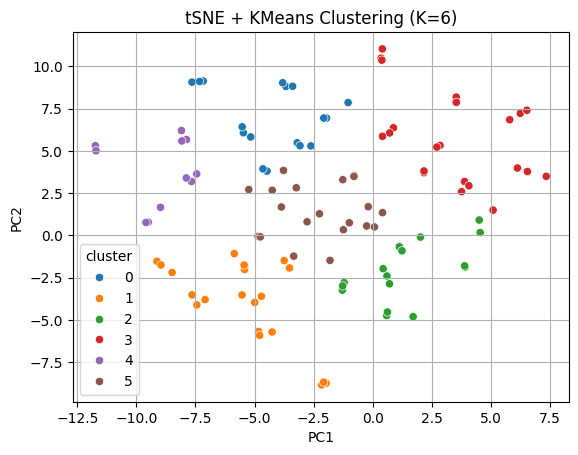

In [8]:
# 🔍 t-SNE + KMeans
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid

# Use same scaled data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_data = pd.DataFrame(tsne.fit_transform(scaled_data), columns=["PC1", "PC2"])

k = 6
kmeans_tsne = KMeans(n_clusters=k, random_state=42)
tsne_data["cluster"] = kmeans_tsne.fit_predict(tsne_data)

# Scores
sil = silhouette_score(tsne_data, tsne_data["cluster"])
dbi = davies_bouldin_score(tsne_data, tsne_data["cluster"])
ch = calinski_harabasz_score(tsne_data, tsne_data["cluster"])
print(f"K={k} | Silhouette={sil:.4f} | DBI={dbi:.4f} | CH={ch:.4f}")

# Plot
sns.scatterplot(data=tsne_data, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title(f'tSNE + KMeans Clustering (K={k})')
plt.grid(True)
plt.show()


🔹 GMM (Soft Clustering) on Output Features Only

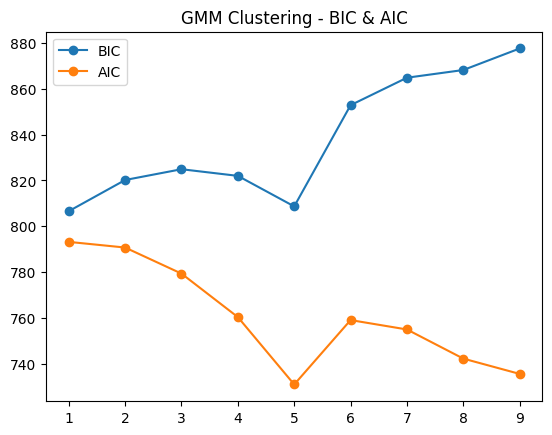

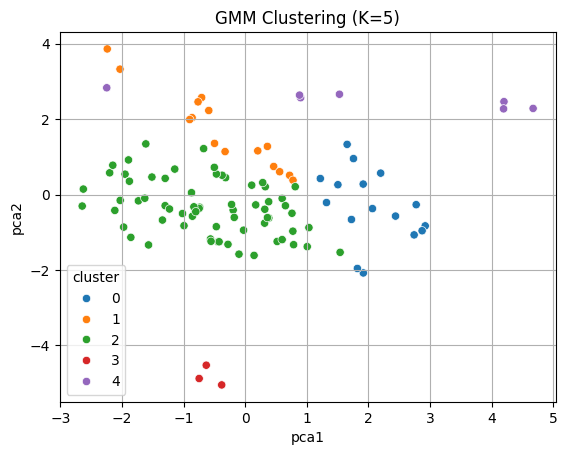

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

X = scaled_data.iloc[:, :-3]  # Drop C, S, G
pca_out = PCA(n_components=2)
X_pca_out = pd.DataFrame(pca_out.fit_transform(X), columns=["pca1", "pca2"])

bics, aics = [], []
for k in range(1, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca_out)
    bics.append(gmm.bic(X_pca_out))
    aics.append(gmm.aic(X_pca_out))

plt.plot(range(1, 10), bics, label="BIC", marker='o')
plt.plot(range(1, 10), aics, label="AIC", marker='o')
plt.title("GMM Clustering - BIC & AIC")
plt.legend()
plt.show()

# Fit optimal
optimal_k = 5
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
labels = gmm.fit_predict(X_pca_out)
X_pca_out["cluster"] = labels

sns.scatterplot(data=X_pca_out, x='pca1', y='pca2', hue='cluster', palette="tab10")
plt.title(f'GMM Clustering (K={optimal_k})')
plt.grid(True)
plt.show()
